In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [93]:
df = pd.read_csv('data.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [94]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [95]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


In [96]:
'''
        SPLITING THE DATA INTO TRAINING, VALIDATION and TEST DATASET 
        SPLITING RATIO : 60:20:20
'''


df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Resesting the Index 


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# Deleting the churn values from the training, validation and testing dataset 

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [98]:
'''
        Making Numerical and Categorical Variables 
        
'''

numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [99]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

## Creating a Dummy Model 

In [101]:
thresholds = np.linspace(0,1,21)
scores = []
for t in thresholds:
    churn_decision = (y_pred>=t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_val,y_pred>=0.5)

0.8034066713981547

In [104]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val,y_pred>=t)
    print('%.2f %.3f' % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.765
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


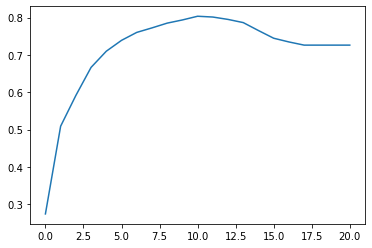

In [105]:
plt.plot(scores)

# Confusion Table
 - Different types of error and correct decisions
 - Arranging them in a table 

In [106]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [107]:
t = 0.5
predict_positive = y_pred>=t
predict_negative = y_pred < t

In [108]:
'''
    p means preicsion 
    r mean recall 
    tp means true positive
    fn means false negative
    fp means false +ve
    tn means true -ve
    
'''
tp = (actual_positive & predict_positive).sum()
tn = (actual_negative & predict_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


p = tp/(tp+fp)
r = tp/(tp+fn)

In [109]:
confusion_matrix = np.array(
[
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [110]:
print("Recall :",r)
print("Precison:",p)

Recall : 0.5440414507772021
Precison: 0.6752411575562701


# ROC 

In [111]:
'''
    TPR means True +ve Rate
    FPR means False +ve Rate
'''
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)


In [112]:
print('True Poitive Rate :', tpr)
print('False Negative Rate :',fpr)

True Poitive Rate : 0.5440414507772021
False Negative Rate : 0.09872922776148582


In [113]:
## Now Implementing on whole data 

scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [114]:
columns = ['threshold','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,75,20,311,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [115]:
df_scores['tpr'] = df_scores.tp/(df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn)

In [116]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


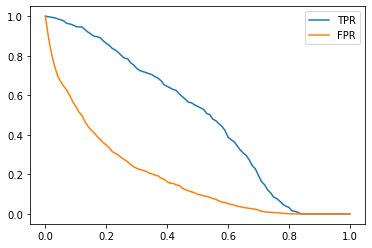

In [117]:
plt.plot(df_scores.threshold,df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold,df_scores['fpr'], label = 'FPR')
plt.legend()

## Random model 

In [118]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size = len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [119]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [120]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)

In [121]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


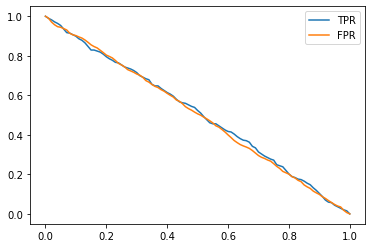

In [122]:
plt.plot(df_rand.threshold,df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold,df_rand['fpr'], label = 'FPR')
plt.legend()

## Ideal Curve


In [123]:
num_neg = (y_val==0).sum()
num_pos = (y_val == 1).sum()
num_neg,num_pos

(1023, 386)

In [124]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal


array([0, 0, 0, ..., 1, 1, 1])

In [125]:
y_ideal_pred = np.linspace(0,1,len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [126]:
1-y_val.mean()

0.7260468417317246

In [127]:
df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_pred)

In [128]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


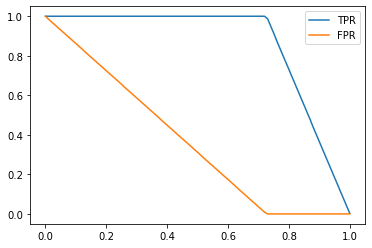

In [129]:
plt.plot(df_ideal.threshold,df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold,df_ideal['fpr'], label = 'FPR')
plt.legend()

## Combining all Graphs Together 

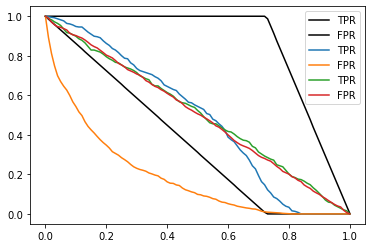

In [130]:
plt.plot(df_ideal.threshold,df_ideal['tpr'], label = 'TPR',color='black')
plt.plot(df_ideal.threshold,df_ideal['fpr'], label = 'FPR',color='black')
plt.legend()

plt.plot(df_scores.threshold,df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold,df_scores['fpr'], label = 'FPR')
plt.legend()

plt.plot(df_rand.threshold,df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold,df_rand['fpr'], label = 'FPR')
plt.legend()

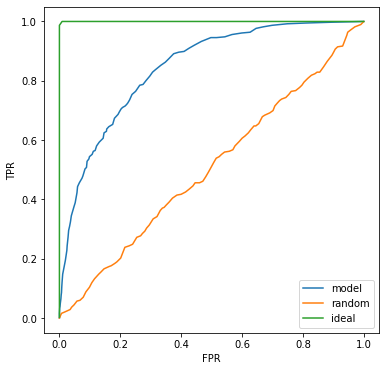

In [131]:
plt.figure(figsize=(6,6))
plt.plot(df_scores.fpr,df_scores.tpr,label = 'model')
plt.plot(df_rand.fpr,df_rand.tpr,label = 'random')
plt.plot(df_ideal.fpr,df_ideal.tpr,label = 'ideal')
         
plt.xlabel('FPR')
plt.ylabel('TPR')
     
plt.legend()

## Using ROC by sklearn 

In [132]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_val,y_pred)

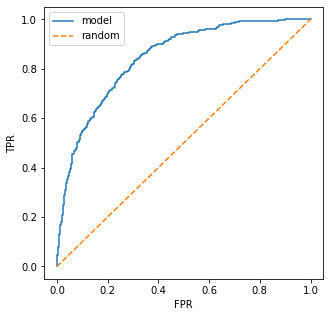

In [133]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label = 'model')
plt.plot([0,1],[0,1],label = 'random',linestyle ='--')

# plt.plot(df_ideal.fpr,df_ideal.tpr,label = 'ideal')
         
plt.xlabel('FPR')
plt.ylabel('TPR')
     
plt.legend()

# ROC AUC

In [134]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.8438429084426076

In [135]:
# for aur model 
auc(df_scores.fpr,df_scores.tpr)

0.8437871950323899

In [136]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999430203759136

In [137]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred)

0.8438429084426076

In [138]:

fpr,tpr,thresholds = roc_curve(y_val,y_pred)
auc(fpr,tpr)

0.8438429084426076

In [139]:
neg = y_pred[y_val==0]
pos = y_pred[y_val==1]

In [140]:
import random
n = 100000
success = 0
for i in range(n):
    pos_ind = random.randint(0,len(pos)-1)
    neg_ind = random.randint(0,len(neg)-1)
    
    if pos[pos_ind]> neg[neg_ind]:
        success+=1
success/n

0.84428

# Cross-Validation 

In [141]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [142]:
dv, model = train(df_train,y_train,C=0.001)

In [143]:
def predict(df,dv,model):
    dicts = df[categorical + numerical].to_dict(orient='records')

#     dv = DictVectorizer(sparse=False)
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [144]:
predict(df_val,dv,model)

array([0.02155921, 0.33135098, 0.33602112, ..., 0.26705435, 0.71907523,
       0.71942517])

In [145]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10,shuffle = True,random_state=1)

In [146]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [147]:
len(train_idx),len(val_idx),len(df_full_train)

(5070, 564, 5634)

In [148]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [149]:
from tqdm.auto import tqdm

In [150]:
n_splits = 5
for C in tqdm([0.001,0.01,0.1,0.5,1,5,10]):
    
    scores = []
    kfold = KFold(n_splits = n_splits,shuffle = True,random_state=1)
    for train_idx, val_idx in tqdm(kfold.split(df_full_train),total=n_splits):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train,y_train,C=C)
        y_pred = predict(df_val,dv,model)

        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)
    print('C=%s %.3f +- %.3f'% (C,np.mean(scores),np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.01 0.840 +- 0.009


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.1 0.841 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.5 0.840 +- 0.006


  0%|          | 0/5 [00:00<?, ?it/s]

C=1 0.840 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

C=5 0.841 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=10 0.842 +- 0.007


In [151]:
scores

[0.8423475755744126,
 0.845850301284598,
 0.8334376881396749,
 0.833697720150924,
 0.8525462018763139]

In [152]:
dv, model = train(df_full_train,df_full_train.churn,C=1.0)
y_pred = predict(df_test,dv,model)

auc = roc_auc_score(y_test,y_pred)

In [153]:
auc

0.8572386167896259